# Car Price Prediction

In this notebook, I will explore a Kaggle dataset focusing on used cars and their pricing. The exploration will be followed by building predictive models for estimating the prices of these cars.

# Import Libraries

In [86]:
import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler

# Data Exploration

In [5]:
data=pd.read_csv('/home/patel/Desktop/CognoRise_InfoTech/Car_price.csv')

In [6]:
data.head(5)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [24]:
data.shape

(205, 26)

In [49]:
data.describe

<bound method NDFrame.describe of      car_ID  symboling                   CarName fueltype aspiration  \
0         1          3        alfa-romero giulia      gas        std   
1         2          3       alfa-romero stelvio      gas        std   
2         3          1  alfa-romero Quadrifoglio      gas        std   
3         4          2               audi 100 ls      gas        std   
4         5          2                audi 100ls      gas        std   
..      ...        ...                       ...      ...        ...   
200     201         -1           volvo 145e (sw)      gas        std   
201     202         -1               volvo 144ea      gas      turbo   
202     203         -1               volvo 244dl      gas        std   
203     204         -1                 volvo 246   diesel      turbo   
204     205         -1               volvo 264gl      gas      turbo   

    doornumber      carbody drivewheel enginelocation  wheelbase  ...  \
0          two  convertible 

In [26]:
print(data['carbody'])
print(data['CarName'])
print(data['car_ID'])

0      convertible
1      convertible
2        hatchback
3            sedan
4            sedan
          ...     
200          sedan
201          sedan
202          sedan
203          sedan
204          sedan
Name: carbody, Length: 205, dtype: object
0            alfa-romero giulia
1           alfa-romero stelvio
2      alfa-romero Quadrifoglio
3                   audi 100 ls
4                    audi 100ls
                 ...           
200             volvo 145e (sw)
201                 volvo 144ea
202                 volvo 244dl
203                   volvo 246
204                 volvo 264gl
Name: CarName, Length: 205, dtype: object
0        1
1        2
2        3
3        4
4        5
      ... 
200    201
201    202
202    203
203    204
204    205
Name: car_ID, Length: 205, dtype: int64


In [27]:
data.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [28]:
data.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [29]:
print(data['fueltype'])

0         gas
1         gas
2         gas
3         gas
4         gas
        ...  
200       gas
201       gas
202       gas
203    diesel
204       gas
Name: fueltype, Length: 205, dtype: object


# Split the dataset into train & test datasets

In [11]:
X_train, X_test, y_train, y_test = train_test_split(data.iloc[:, :-1], 
                                                    data.iloc[:, -1], 
                                                    test_size = 0.3, 
                                                    random_state = 42)

In [12]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 143 entries, 177 to 102
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            143 non-null    int64  
 1   symboling         143 non-null    int64  
 2   CarName           143 non-null    object 
 3   fueltype          143 non-null    object 
 4   aspiration        143 non-null    object 
 5   doornumber        143 non-null    object 
 6   carbody           143 non-null    object 
 7   drivewheel        143 non-null    object 
 8   enginelocation    143 non-null    object 
 9   wheelbase         143 non-null    float64
 10  carlength         143 non-null    float64
 11  carwidth          143 non-null    float64
 12  carheight         143 non-null    float64
 13  curbweight        143 non-null    int64  
 14  enginetype        143 non-null    object 
 15  cylindernumber    143 non-null    object 
 16  enginesize        143 non-null    int64  
 17  

# Exploratory Data Analysis

In [17]:
X_train = X_train.iloc[:,1:]
X_test = x_test.iloc[:,1:]

In [16]:
X_train["CarName"].value_counts()

CarName
peugeot 504                     5
toyota corona                   4
toyota corolla                  3
subaru dl                       3
subaru                          2
                               ..
volkswagen 1131 deluxe sedan    1
volkswagen model 111            1
alfa-romero giulia              1
toyota tercel                   1
nissan fuga                     1
Name: count, Length: 110, dtype: int64

In [34]:
data.enginesize

0      130
1      130
2      152
3      109
4      136
      ... 
200    141
201    141
202    173
203    145
204    141
Name: enginesize, Length: 205, dtype: int64

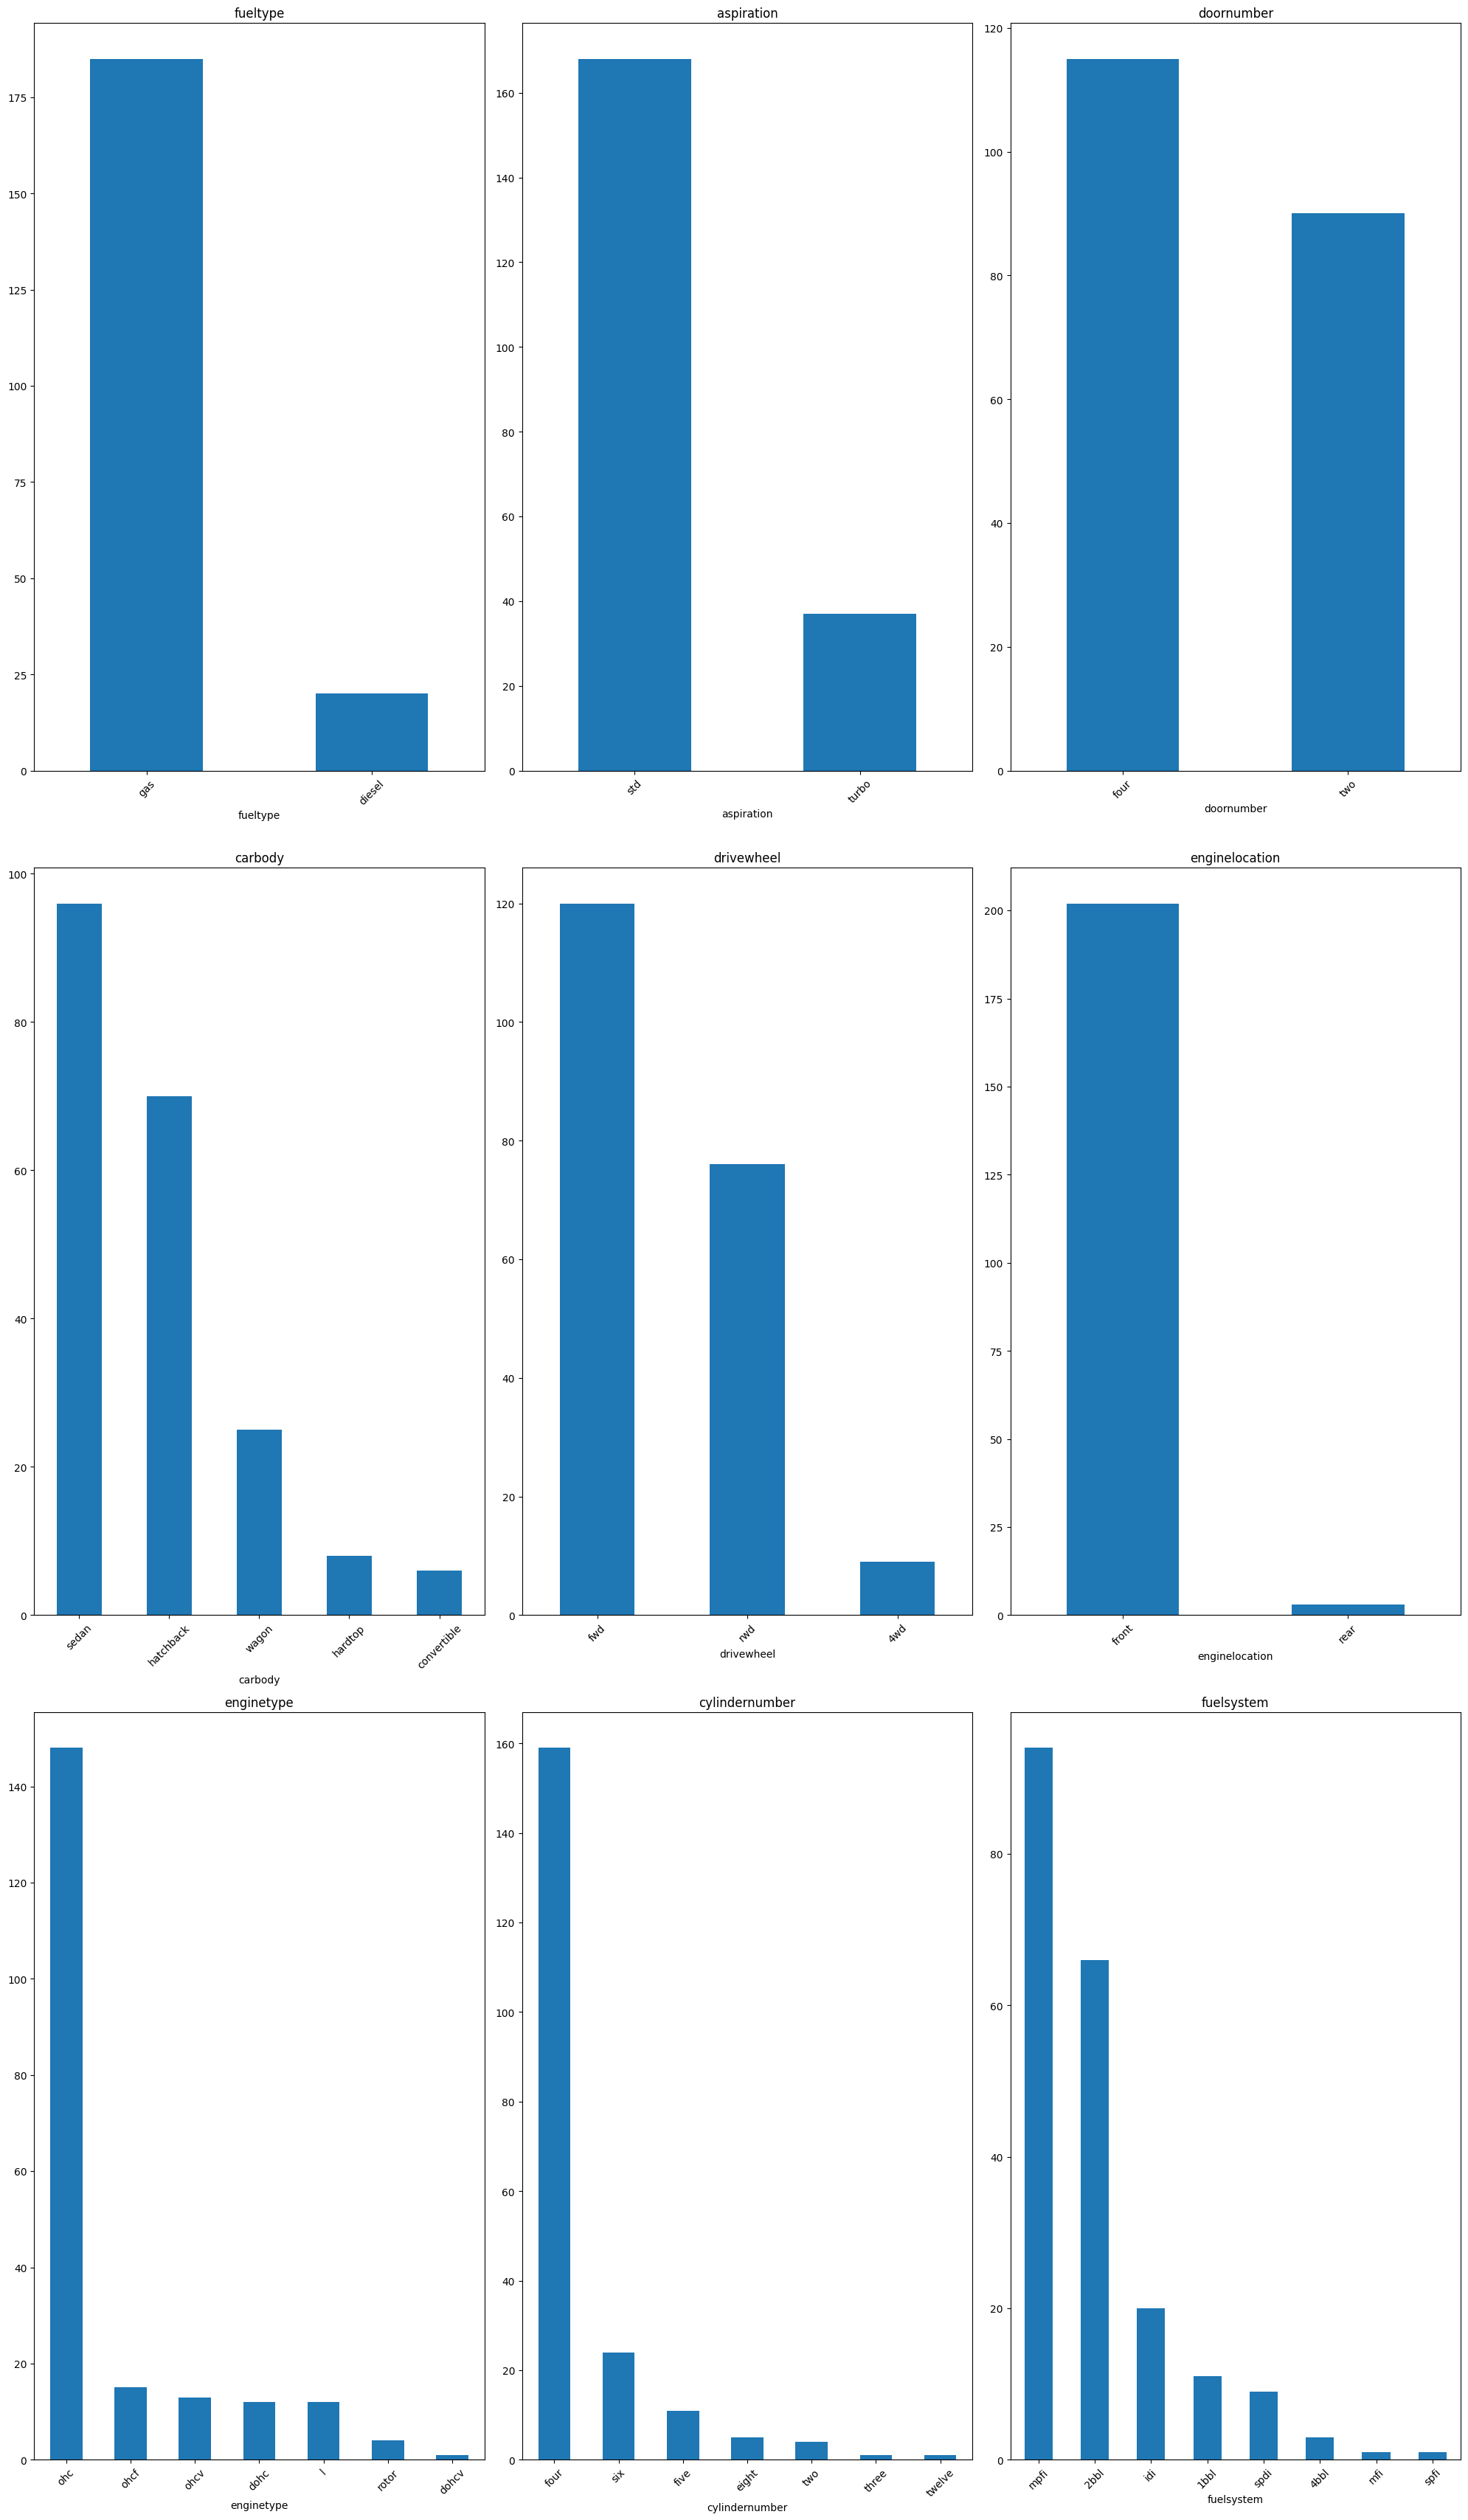

In [72]:
col_category = ['fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem']
plt.figure(figsize=(20, 5*len(col_category)))
for i, col in enumerate(col_category, start=1):
    plt.subplot(len(col_category)//3+1, 3, i)
    data[col].value_counts().plot(kind='bar')
    plt.title(col)
    plt.xticks(rotation=45)
plt.tight_layout()  
plt.show()


# Data Processing

In [79]:
y_train = data.pop('price') 
X_train = data

In [80]:
y_train.head()

0    13495.0
1    16500.0
2    16500.0
3    13950.0
4    17450.0
Name: price, dtype: float64

In [81]:
X_train.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
0,1,3,alfa-romero giulia,1,1,0,convertible,0.0,1,88.6,...,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27
1,2,3,alfa-romero stelvio,1,1,0,convertible,0.0,1,88.6,...,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27
2,3,1,alfa-romero Quadrifoglio,1,1,0,hatchback,0.0,1,94.5,...,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26
3,4,2,audi 100 ls,1,1,1,sedan,1.0,1,99.8,...,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30
4,5,2,audi 100ls,1,1,1,sedan,NaN,1,99.4,...,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22


# Prediction

<Axes: >

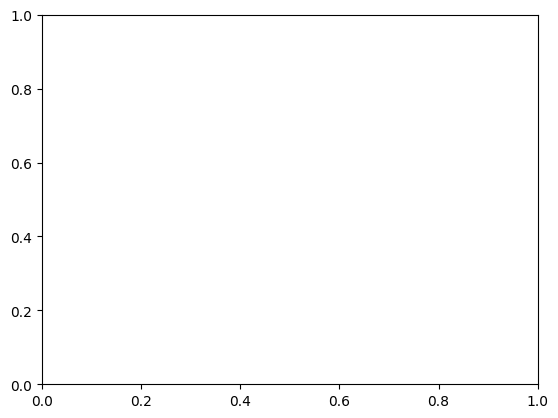

In [103]:
sns.scatterplot()

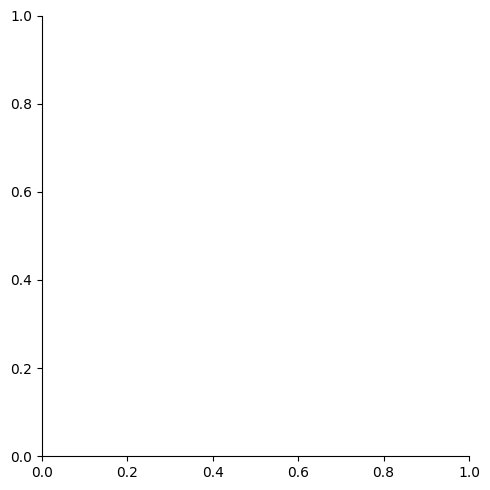

In [102]:
sns.displot()

# Data Modelling

In [73]:
data['fueltype'] = data['fueltype'].map({'gas': 1, 'diesel': 0})
data.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,1,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,1,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,1,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,1,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,1,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [74]:
data['aspiration'] = data['aspiration'].map({'std':1, 'turbo':0})
data.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,1,1,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,1,1,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,1,1,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,1,1,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,1,1,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [75]:
data['doornumber'] = data['doornumber'].map({'four':1, 'two':0})
data.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,1,1,0,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,1,1,0,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,1,1,0,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,1,1,1,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,1,1,1,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [76]:
data['drivewheel'] = data['drivewheel'].map({'fwd':1, 'rwd':0})
data.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,1,1,0,convertible,0.0,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,1,1,0,convertible,0.0,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,1,1,0,hatchback,0.0,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,1,1,1,sedan,1.0,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,1,1,1,sedan,NaN,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [77]:
data['enginelocation'] = data['enginelocation'].map({'front':1, 'rear':0})
data.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,1,1,0,convertible,0.0,1,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,1,1,0,convertible,0.0,1,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,1,1,0,hatchback,0.0,1,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,1,1,1,sedan,1.0,1,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,1,1,1,sedan,NaN,1,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


# Data Visulization

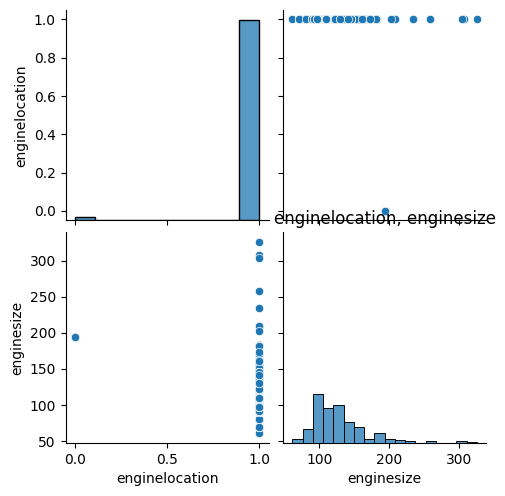

In [137]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.pairplot(data[['enginelocation', 'enginesize']])
plt.title('enginelocation, enginesize')
plt.show()